In this notebook, I want to wrap up some loose ends from last time.

## The two cultures

This "debate" captures the tension between two approaches:

- modeling the underlying mechanism of a phenomena
- using machine learning to predict outputs (without necessarily understanding the mechanisms that create them)

<img src="images/glutathione.jpg" alt="One carbon cell metabolism" style="width: 80%"/>

I was part of a research project (in 2007) that involved manually coding each of the above reactions.  We were determining if the final system could generate the same ouputs (in this case, levels in the blood of various substrates) as were observed in clinical studies.  

The equation for each reaction could be quite complex:
<img src="images/vcbs.png" alt="reaction equation" style="width: 80%"/>

This is an example of modeling the underlying mechanism, and is very different from a machine learning approach.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2391141/

## The most popular word in each state

<img src="images/map-popular-word.png" alt="The" style="width: 80%"/>

A time to remove stop words

## Factorization is analgous to matrix decomposition

### With Integers

Multiplication: 
	$$2 * 2 * 3 * 3 * 2 * 2 \rightarrow 144$$
    
<img src="images/factorization.png" alt="factorization" style="width: 50%"/>

Factorization is the “opposite” of multiplication: 
	 $$144 \rightarrow 2 * 2 * 3 * 3 * 2 * 2$$
     
Here, the factors have the nice property of being prime.

Prime factorization is much harder than multiplication (which is good, because it’s the heart of encryption).

### With Matrices

Matrix decompositions are a way of taking matrices apart (the "opposite" of matrix multiplication).

Similarly, we use matrix decompositions to come up with matrices with nice properties.

Taking matrices apart is harder than putting them together.

[One application](https://github.com/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb):

<img src="images/grid1.jpg" alt="The" style="width: 100%"/>

What are the nice properties that matrices in an SVD decomposition have?

$$A = USV$$

## Some Linear Algebra Review

### Matrix-vector multiplication

$Ax = b$ takes a linear combination of the columns of $A$, using coefficients $x$

http://matrixmultiplication.xyz/

### Matrix-matrix multiplication

$A B = C$ each column of C is a linear combination of columns of A, where the coefficients come from the corresponding column of C

<img src="images/face_nmf.png" alt="NMF on faces" style="width: 80%"/>

(source: [NMF Tutorial](http://perso.telecom-paristech.fr/~essid/teach/NMF_tutorial_ICME-2014.pdf))

### Matrices as Transformations

The 3Blue 1Brown [Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos are fantastic.  They give a much more visual & geometric perspective on linear algreba than how it is typically taught.  These videos are a great resource if you are a linear algebra beginner, or feel uncomfortable or rusty with the material.

Even if you are a linear algrebra pro, I still recommend these videos for a new perspective, and they are very well made.

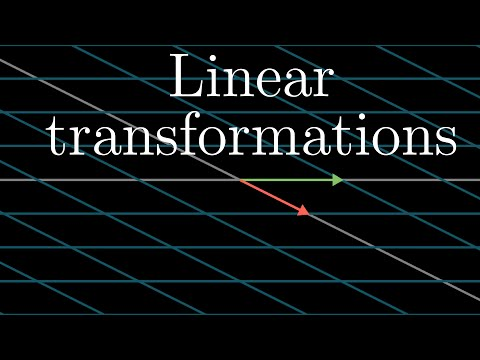

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("kYB8IZa5AuE")

## British Literature SVD & NMF in Excel

### Data set was downloaded from [here](https://de.dariah.eu/tatom/datasets.html)
### Make a folder /literature in the course notebooks directory /course-nlp
### Download the data set and extract it into the /literature directory


The code below was used to create the matrices which are displayed in the SVD and NMF of British Literature excel workbook. The data is intended to be viewed in Excel, I've just included the code here for thoroughness.

## 1. Get the document-term matrix (dtm)

### Initialize

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import decomposition
from glob import glob
import os
np.set_printoptions(suppress=True)

### 1A. Create the list of document filenames 

In [166]:
filenames = []
for folder in ["british-fiction-corpus"]: #, "french-plays", "hugo-les-misérables"]:
    #filenames.extend(glob("data/literature/" + folder + "/*.txt"))
    filenames.extend(glob("literature/data/" + folder + "/*.txt"))
print(f'There are {len(filenames)} document files')
# this is what the full-path filenames look like on a machine running windows 10 
filenames

There are 27 document files


['literature/data/british-fiction-corpus\\ABronte_Agnes.txt',
 'literature/data/british-fiction-corpus\\ABronte_Tenant.txt',
 'literature/data/british-fiction-corpus\\Austen_Emma.txt',
 'literature/data/british-fiction-corpus\\Austen_Pride.txt',
 'literature/data/british-fiction-corpus\\Austen_Sense.txt',
 'literature/data/british-fiction-corpus\\CBronte_Jane.txt',
 'literature/data/british-fiction-corpus\\CBronte_Professor.txt',
 'literature/data/british-fiction-corpus\\CBronte_Villette.txt',
 'literature/data/british-fiction-corpus\\Dickens_Bleak.txt',
 'literature/data/british-fiction-corpus\\Dickens_David.txt',
 'literature/data/british-fiction-corpus\\Dickens_Hard.txt',
 'literature/data/british-fiction-corpus\\EBronte_Wuthering.txt',
 'literature/data/british-fiction-corpus\\Eliot_Adam.txt',
 'literature/data/british-fiction-corpus\\Eliot_Middlemarch.txt',
 'literature/data/british-fiction-corpus\\Eliot_Mill.txt',
 'literature/data/british-fiction-corpus\\Fielding_Joseph.txt',
 '

In [167]:
# original command to get the names of the text files
#[f.split("/")[3] for f in filenames]

# modified for the suggested directory structure, in windows 10
[f.split("/")[2].split('\\')[1] for f in filenames]

['ABronte_Agnes.txt',
 'ABronte_Tenant.txt',
 'Austen_Emma.txt',
 'Austen_Pride.txt',
 'Austen_Sense.txt',
 'CBronte_Jane.txt',
 'CBronte_Professor.txt',
 'CBronte_Villette.txt',
 'Dickens_Bleak.txt',
 'Dickens_David.txt',
 'Dickens_Hard.txt',
 'EBronte_Wuthering.txt',
 'Eliot_Adam.txt',
 'Eliot_Middlemarch.txt',
 'Eliot_Mill.txt',
 'Fielding_Joseph.txt',
 'Fielding_Tom.txt',
 'Richardson_Clarissa.txt',
 'Richardson_Pamela.txt',
 'Sterne_Sentimental.txt',
 'Sterne_Tristram.txt',
 'Thackeray_Barry.txt',
 'Thackeray_Pendennis.txt',
 'Thackeray_Vanity.txt',
 'Trollope_Barchester.txt',
 'Trollope_Phineas.txt',
 'Trollope_Prime.txt']

### 1B. Create the list of document names

In [163]:
# get document names, by dropping the '.txt' suffix from the document filenames
documents = [f[:-4].split("/")[2].split('\\')[1] for f in filenames]
documents

['ABronte_Agnes',
 'ABronte_Tenant',
 'Austen_Emma',
 'Austen_Pride',
 'Austen_Sense',
 'CBronte_Jane',
 'CBronte_Professor',
 'CBronte_Villette',
 'Dickens_Bleak',
 'Dickens_David',
 'Dickens_Hard',
 'EBronte_Wuthering',
 'Eliot_Adam',
 'Eliot_Middlemarch',
 'Eliot_Mill',
 'Fielding_Joseph',
 'Fielding_Tom',
 'Richardson_Clarissa',
 'Richardson_Pamela',
 'Sterne_Sentimental',
 'Sterne_Tristram',
 'Thackeray_Barry',
 'Thackeray_Pendennis',
 'Thackeray_Vanity',
 'Trollope_Barchester',
 'Trollope_Phineas',
 'Trollope_Prime']

### 1C. Create the document-term matrix and the vocabulary from the input files
#### The document-term matrix $dtm$ is a $m \times n$ matrix, where $m$ is the number of documents and $n$ is the number of terms (i.e. tokens or vocabulary words). The $dtm$ gives the weight of each term within a document,
#### and can be created by `TfidfVectorizer`in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#### $tfidf$ refers to the product of `term frequency` $tf$ and `inverse document frequency` $idf$:

#### $tfidf = tf \times idf$

#### `term frequency` is a $m \times n$ matrix that records how often each vocabulary term occurs in each document
#### `document frequency` is a vector of length $n$ that records the fraction of documents in the corpus that contain each term
#### `inverse document frequency` $idf$ is a monotonic function of the reciprocal of `document frequency` that measures the relative 'rarity' of a term within in the corpus (set) of documents:

#### $idf(t) \equiv log \frac{N}{n(t)} + 1$,

#### where $t$ is a term, $N$ is the total number of documents, and $n(t)$ is the number of documents containing the term $t$.

#### Therefore $tfidf$ weights each (document,term) pair by the number of counts of that term within that document scaled by the relative 'rarity' of that word within the corpus of documents.

In [181]:
# `TfidfVectorizer` is equivalent to `CountVectorizer` followed by `TfidfTransformer`
vectorizer = TfidfVectorizer(input='filename', stop_words='english')

# generate the document-term matrix and the vocabulary arrays from the input documents
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())
print(f'document-term matrix shape is {dtm.shape}, and vocabulary has {len(vocab)} words')

document-term matrix shape is (27, 55035), and vocabulary has 55035 words


## 2. Non-negative Matrix Factorization of the dtm
### The user chooses the number `k` of "features" (topics) to be discovered by the network
### `sklearn.decomposition.NMF(k)` splits the document-term matrix `A` into two non-negative matrix factors `W` and `H`, such that `A = W@H`, where `@` denotes the matrix product.
### If `A` is an `mxn` array, then `W` is a `mxk` array and `H` is a `kxn` array.
### The rows of `W` map each document into a `k`-dimensional feature space.
### The columns of `H` map each term into a k-dimensional feature space.  

In [14]:
# Here, clf means "classifier"
clf = decomposition.NMF(n_components=10, random_state=1)
W1 = clf.fit_transform(dtm)
H1 = clf.components_

In [169]:
print(f'W1.shape is {W1.shape}, H1.shape is {H1.shape}')

W1.shape is (27, 10), H1.shape is (10, 55035)


### 2A. Identify the *words* most closely associated with each 'topic' feature

In [170]:
num_top_words=8

def show_topic_words(H):
    # Given a vector of weights, this function lists the most heavily weighted words, in
    #   increasing order of weight
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    # iterate through the rows of H, joining the word lists together for all 10 topics 
    topic_words = ([top_words(t) for t in H])
    return [' '.join(t) for t in topic_words]

In [171]:
# 10 x 8 array of top words associated with each 'topic' feature
show_topic_words(H1)

['mr said lydgate mrs dorothea micawber little know',
 'said little like did time know good thought',
 'adams jones said allworthy sophia lady joseph mr',
 'elinor mr emma darcy mrs weston marianne miss',
 'maggie tulliver said tom glegg philip mr wakem',
 'heathcliff linton hareton catherine earnshaw cathy edgar ll',
 'toby said uncle father corporal quoth tis trim',
 'phineas said lopez mr finn man wharton laura',
 'bounderby gradgrind sparsit said mr sissy louisa stephen',
 'crawley said lyndon pendennis old little osborne lady']

### 2B. Identify the vocabulary subset most closely associated with the 'topic' features

In [60]:
def get_all_topic_words(H):
    # Given a vector of weights, this function lists the indices of the most 
    #      heavily weighted words in increasing order of weight
    top_indices = lambda t: {i for i in np.argsort(t)[:-num_top_words-1:-1]}
    # combine the index lists for all topics into a list of lists 
    topic_indices = [top_indices(t) for t in H]
    # return a sorted list of all the unique word indices
    return sorted(set.union(*topic_indices))

In [172]:
# ordered list of topic word indices (with respect to the vocab list)
topic_word_indices = get_all_topic_words(H1)
print(f'There are {len(topic_word_indices)} vocabulary words most closely associated with the topic features')
topic_word_indices

There are 63 vocabulary words most closely associated with the topic features


[2283,
 3054,
 7154,
 8859,
 8865,
 12064,
 12520,
 13336,
 14707,
 15966,
 16642,
 16786,
 17071,
 17258,
 19252,
 19829,
 22058,
 22272,
 22420,
 23439,
 23793,
 27641,
 27653,
 28151,
 28343,
 28623,
 29186,
 29310,
 29403,
 29450,
 29663,
 29737,
 30021,
 30035,
 30173,
 30412,
 30624,
 31419,
 31843,
 32470,
 32471,
 34060,
 34422,
 35831,
 36371,
 36415,
 39466,
 42352,
 44505,
 45366,
 45584,
 46358,
 48786,
 49091,
 49194,
 49244,
 49304,
 49916,
 50210,
 50737,
 53297,
 53811,
 53837]

In [173]:
# vocabulary of topic words
vocab[topic_word_indices]

array(['adams', 'allworthy', 'bounderby', 'catherine', 'cathy',
       'corporal', 'crawley', 'darcy', 'did', 'dorothea', 'earnshaw',
       'edgar', 'elinor', 'emma', 'father', 'finn', 'glegg', 'good',
       'gradgrind', 'hareton', 'heathcliff', 'jones', 'joseph', 'know',
       'lady', 'laura', 'like', 'linton', 'little', 'll', 'lopez',
       'louisa', 'lydgate', 'lyndon', 'maggie', 'man', 'marianne',
       'micawber', 'miss', 'mr', 'mrs', 'old', 'osborne', 'pendennis',
       'philip', 'phineas', 'quoth', 'said', 'sissy', 'sophia', 'sparsit',
       'stephen', 'thought', 'time', 'tis', 'toby', 'tom', 'trim',
       'tulliver', 'uncle', 'wakem', 'weston', 'wharton'], dtype='<U31')

In [174]:
W1.shape, H1[:, topic_word_indices].shape

((27, 10), (10, 63))

### 2C. We can also identify the *books* most closely associated with each 'topic' feature!

In [175]:
num_top_docs = 5

def show_topic_docs(W):
    # Given a vector of weights, this function lists the most heavily weighted documents, in
    #    increasing order of weight
    top_docs = lambda t: [documents[i] for i in np.argsort(t)[:-num_top_docs-1:-1]]
    # iterate through the rows of H, joining the doc lists together for all 10 topics 
    topic_docs = ([top_docs(t) for t in W])
    return [' '.join(t) for t in topic_docs]
show_topic_docs(W1.T)

['Trollope_Barchester Eliot_Middlemarch Dickens_David Dickens_Bleak Richardson_Pamela',
 'CBronte_Villette CBronte_Professor CBronte_Jane ABronte_Tenant Eliot_Adam',
 'Fielding_Joseph Fielding_Tom Richardson_Clarissa Richardson_Pamela Thackeray_Barry',
 'Austen_Emma Austen_Pride Austen_Sense ABronte_Agnes Richardson_Clarissa',
 'Eliot_Mill Eliot_Adam Richardson_Pamela ABronte_Agnes Thackeray_Pendennis',
 'EBronte_Wuthering ABronte_Tenant ABronte_Agnes CBronte_Jane Dickens_Bleak',
 'Sterne_Tristram Sterne_Sentimental Richardson_Pamela Thackeray_Barry Richardson_Clarissa',
 'Trollope_Phineas Trollope_Prime Thackeray_Pendennis Richardson_Pamela ABronte_Tenant',
 'Dickens_Hard Richardson_Pamela Dickens_Bleak Eliot_Adam CBronte_Jane',
 'Thackeray_Vanity Thackeray_Pendennis Thackeray_Barry Dickens_Bleak Richardson_Pamela']

### 2D. Export to CSVs

In [87]:
from IPython.display import FileLink, FileLinks

In [88]:
np.savetxt("britlit_W.csv", W1, delimiter=",", fmt='%.14f')
FileLink('britlit_W.csv')

C:\Users\cross-entropy\fastai\course-nlp\britlit_W.csv

In [89]:
np.savetxt("britlit_H.csv", H1[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_H.csv')

C:\Users\cross-entropy\fastai\course-nlp\britlit_H.csv

In [90]:
np.savetxt("britlit_raw.csv", dtm[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_raw.csv')

C:\Users\cross-entropy\fastai\course-nlp\britlit_raw.csv

## 3. Singular Value Decomposition of the dtm
### sklearn.decomposition.randomized_svd factors the matrix into its singular value decomposition, again choosing the `k` highest singular values, and taking advantage of the speedup of randomized SVD 

In [177]:
U, S, V = decomposition.randomized_svd(dtm, 10)
U.shape, S.shape, V.shape

((27, 10), (10,), (10, 55035))

### 3A. Identify the *words* most closely associated with each 'topic' feature

In [178]:
show_topic_words(V)

['said mr little did good know man mrs',
 'toby monsieur fleur hunsden madame pelet bretton crimsworth',
 'adams toby lady jones joseph man allworthy sophia',
 'elinor marianne darcy emma weston miss dashwood jennings',
 'toby maggie elinor marianne tulliver bounderby dashwood jennings',
 'heathcliff adams linton joseph maggie bounderby catherine hareton',
 'toby emma darcy weston knightley elton uncle elizabeth',
 'heathcliff phineas elinor linton marianne lopez finn hareton',
 'bounderby toby heathcliff gradgrind crawley sparsit linton elinor',
 'bounderby gradgrind sparsit adams sissy louisa fleur jones']

### 3B. Identify the vocabulary subset most closely associated with the 'topic' features

In [179]:
topic_word_indices_SVD = get_all_topic_words(V)
print(f'There are {len(topic_word_indices_SVD)} vocabulary words most closely associated with the topic features')
vocab[topic_word_indices_SVD]

There are 49 vocabulary words most closely associated with the topic features


array(['adams', 'allworthy', 'bounderby', 'bretton', 'catherine',
       'crawley', 'crimsworth', 'darcy', 'dashwood', 'did', 'elinor',
       'elizabeth', 'elton', 'emma', 'finn', 'fleur', 'good', 'gradgrind',
       'hareton', 'heathcliff', 'hunsden', 'jennings', 'jones', 'joseph',
       'knightley', 'know', 'lady', 'linton', 'little', 'lopez', 'louisa',
       'madame', 'maggie', 'man', 'marianne', 'miss', 'monsieur', 'mr',
       'mrs', 'pelet', 'phineas', 'said', 'sissy', 'sophia', 'sparsit',
       'toby', 'tulliver', 'uncle', 'weston'], dtype='<U31')

### 3C. Identify the *books* most closely associated with each 'topic' feature

In [180]:
show_topic_docs(U.T)

['Richardson_Pamela ABronte_Tenant CBronte_Jane ABronte_Agnes Dickens_Bleak',
 'Sterne_Tristram Sterne_Sentimental CBronte_Professor CBronte_Villette Thackeray_Barry',
 'Fielding_Joseph Fielding_Tom Richardson_Clarissa Sterne_Tristram Thackeray_Barry',
 'Austen_Sense Austen_Emma Austen_Pride CBronte_Jane ABronte_Agnes',
 'Austen_Sense Sterne_Tristram Eliot_Mill Dickens_Hard Richardson_Clarissa',
 'EBronte_Wuthering Fielding_Joseph Dickens_Hard Eliot_Mill Fielding_Tom',
 'Sterne_Tristram Austen_Emma Austen_Pride Trollope_Barchester Trollope_Phineas',
 'EBronte_Wuthering Austen_Sense Trollope_Phineas Trollope_Prime Eliot_Middlemarch',
 'Dickens_Hard Thackeray_Vanity EBronte_Wuthering Sterne_Tristram Austen_Sense',
 'Dickens_Hard Fielding_Joseph CBronte_Professor Sterne_Sentimental Fielding_Tom']

### 3D. Export to CSVs

In [107]:
np.savetxt("britlit_U.csv", U, delimiter=",", fmt='%.14f')
FileLink('britlit_U.csv')

C:\Users\cross-entropy\fastai\course-nlp\britlit_U.csv

In [108]:
np.savetxt("britlit_V.csv", V[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_V.csv')

C:\Users\cross-entropy\fastai\course-nlp\britlit_V.csv

In [109]:
np.savetxt("britlit_raw_svd.csv", dtm[:,ind], delimiter=",", fmt='%.14f')
FileLink('britlit_raw_svd.csv')

C:\Users\cross-entropy\fastai\course-nlp\britlit_raw_svd.csv

In [110]:
np.savetxt("britlit_S.csv", np.diag(S), delimiter=",", fmt='%.14f')
FileLink('britlit_S.csv')

C:\Users\cross-entropy\fastai\course-nlp\britlit_S.csv

## Randomized SVD offers a speed up

<img src="images/svd_slow.png" alt="" style="width: 80%"/>

One way to address this is to use randomized SVD.  In the below chart, the error is the difference between A - U * S * V, that is, what you've failed to capture in your decomposition:

<img src="images/svd_speed.png" alt="" style="width: 60%"/>

For more on randomized SVD, check out my [PyBay 2017 talk](https://www.youtube.com/watch?v=7i6kBz1kZ-A&list=PLtmWHNX-gukLQlMvtRJ19s7-8MrnRV6h6&index=7).

For significantly more on randomized SVD, check out the [Computational Linear Algebra course](https://github.com/fastai/numerical-linear-algebra).

## Full vs Reduced SVD

Remember how we were calling `np.linalg.svd(vectors, full_matrices=False)`?  We set `full_matrices=False` to calculate the reduced SVD.  For the full SVD, both U and V are **square** matrices, where the extra columns in U form an orthonormal basis (but zero out when multiplied by extra rows of zeros in S).

Diagrams from Trefethen https://www.cs.cornell.edu/courses/cs322/2008sp/stuff/TrefethenBau_Lec4_SVD.pdf:

<img src="images/full_svd.JPG" alt="" style="width: 80%"/>

<img src="images/reduced_svd.JPG" alt="" style="width: 70%"/>